In [230]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import shapefile as shp

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/samplesuperstore/SampleSuperstore.csv


In [231]:
data = pd.read_csv('/kaggle/input/samplesuperstore/SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [232]:
data.shape
#9993 rows and 13 columns

(9993, 13)

In [233]:
data.info()
#does not contain any missing values  
#two numerical columns : Postal code, quantity

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9993 non-null   object 
 1   Segment       9993 non-null   object 
 2   Country       9993 non-null   object 
 3   City          9993 non-null   object 
 4   State         9993 non-null   object 
 5   Postal Code   9993 non-null   int64  
 6   Region        9993 non-null   object 
 7   Category      9993 non-null   object 
 8   Sub-Category  9993 non-null   object 
 9   Sales         9993 non-null   float64
 10  Quantity      9993 non-null   int64  
 11  Discount      9993 non-null   float64
 12  Profit        9993 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.0+ KB


In [234]:
data = data.drop(['Postal Code','Country'], axis =1)

In [235]:
data.nunique()
#There are three types in segment
#Since country is one, we can remove that column as well
#There are 4 regions
#3 categories and 17 sub-categories

Ship Mode          4
Segment            3
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5824
Quantity          14
Discount          12
Profit          7286
dtype: int64

In [236]:
data.describe(include ='all')

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9993,9993,9993,9993,9993,9993,9993,9993.000000,9993.000000,9993.000000,9993.000000
unique,4,3,531,49,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,New York City,California,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5190,915,2000,3202,6025,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229.856670,3.789753,0.156218,28.652464
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.276273,2.225149,0.206456,234.271411
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.480000,3.000000,0.200000,8.662000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [237]:
#The maximum sale made is 22638.480000 and the minimum is 0.44000
#The max quantity sold is 14 and min is 1, the average is around 4
#A negative profit margin is when production costs are more that revenue, since it is minimum thats good
#Average profit made is 29

In [238]:
cat_col = data.select_dtypes(include = ['object']).columns
num_col = data.select_dtypes(include = ['int64','float64']).columns
print('Categorical variables : ',cat_col)
print('Numerical variables : ',num_col)

Categorical variables :  Index(['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category'],
      dtype='object')
Numerical variables :  Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')


# EXPLORATORY DATA ANALYSIS************

In [239]:
data['Sales'].max()

22638.48

Sales
<built-in method count of str object at 0x7b8931c926b0>
Skew : 12.97


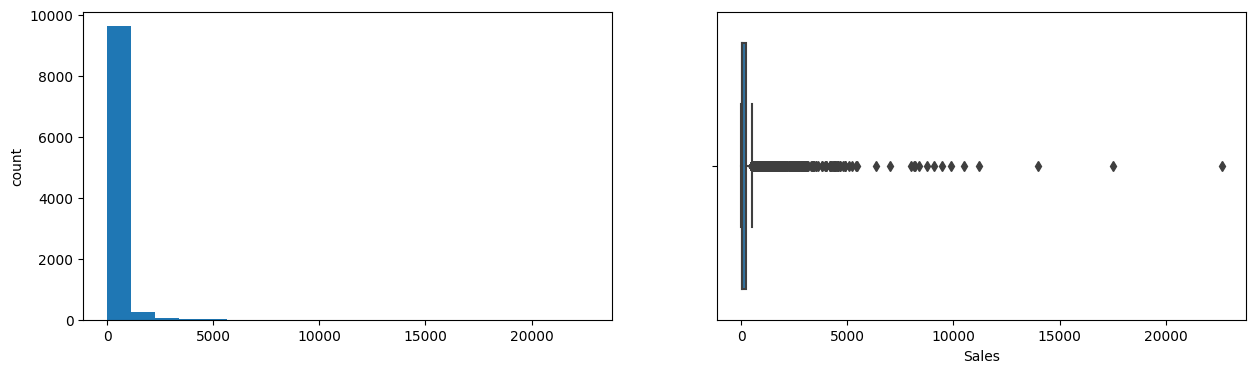

Quantity
<built-in method count of str object at 0x7b8930c7dfb0>
Skew : 1.28


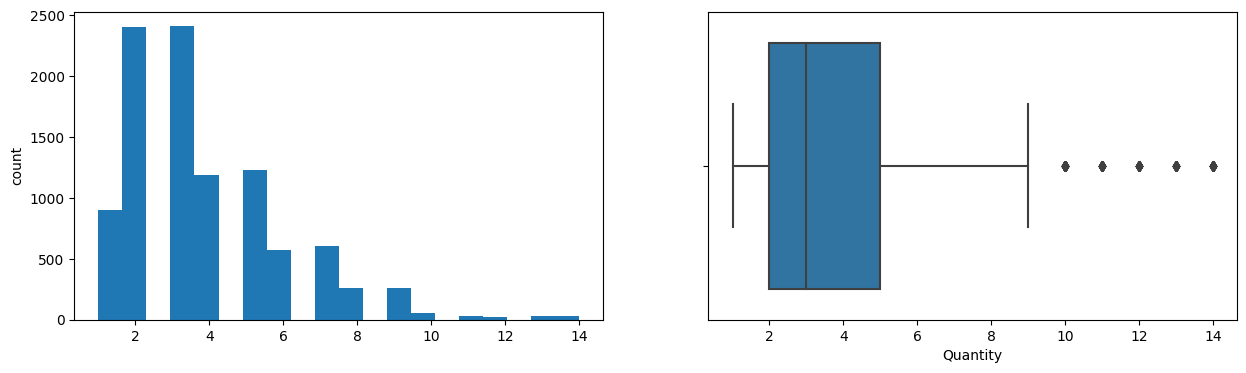

Discount
<built-in method count of str object at 0x7b8932496f30>
Skew : 1.68


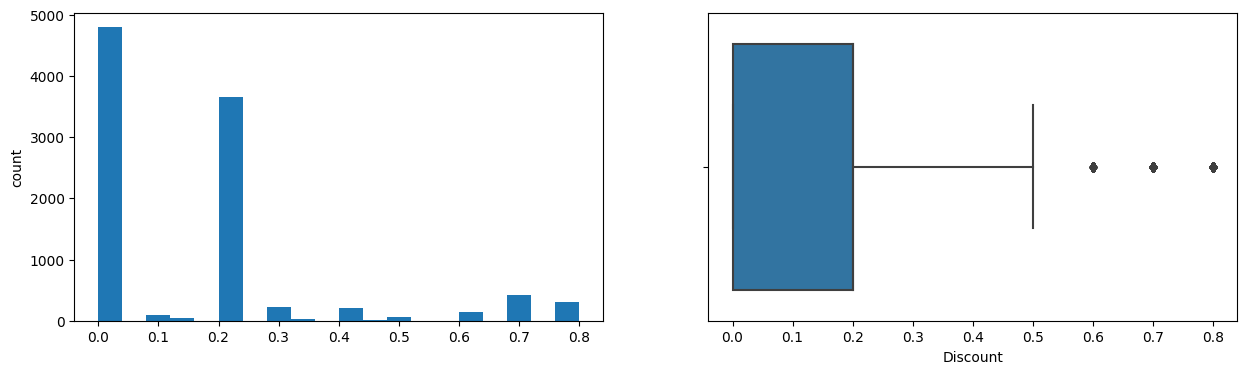

Profit
<built-in method count of str object at 0x7b8930c490f0>
Skew : 7.56


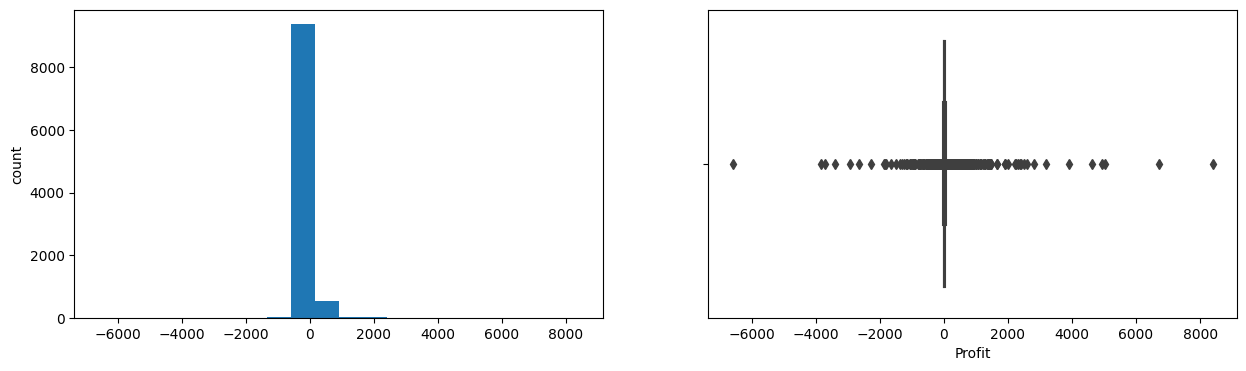

In [240]:
for col in num_col:
    print(col)
    count = col.count
    print(count)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False, bins = 20)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

Observations : 
The sales box plot shows many data points after the whisker,which must be trend-related factors such as holiday shopping or special promotions. 

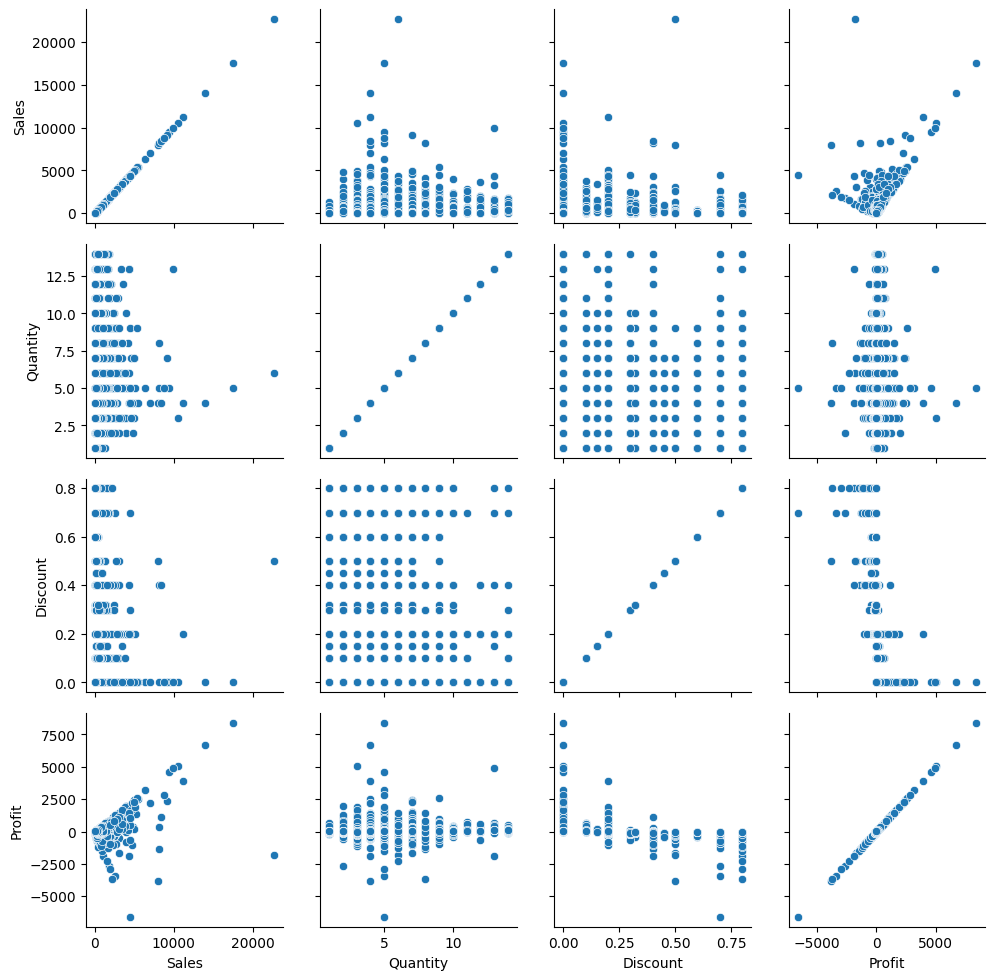

In [249]:
g = sns.PairGrid(num_data)
g.map(sns.scatterplot)

Observations:
1. Profit and Sales - The profit is clustered around the 0 and no visible increase in profits as sale increases. It shows that the sales does not affect the profit.
2. Similarly, quantity is also not correlated to profit. As discount increases, we can see that profit decreases.

# bar charts for analysing ship mode and segment****

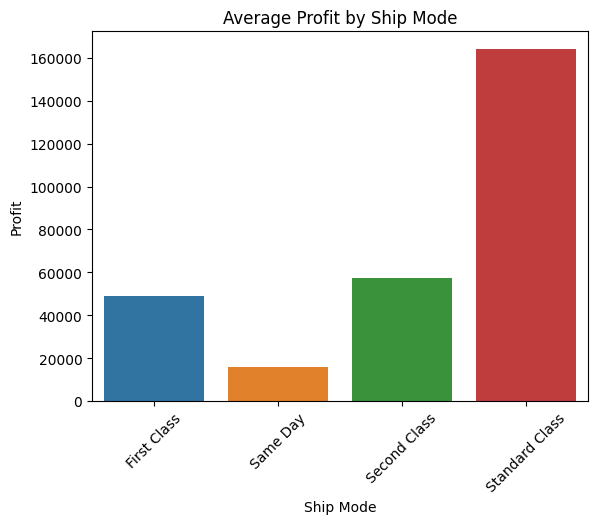

In [242]:
sns.barplot(data= data, x=shipmode_profit.index, y=shipmode_profit.values)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel("Ship Mode")
plt.ylabel("Profit")
plt.title("Average Profit by Ship Mode")
plt.show()

Segment
Consumer       134046.2612
Corporate       91979.1340
Home Office     60298.6785
Name: Profit, dtype: float64


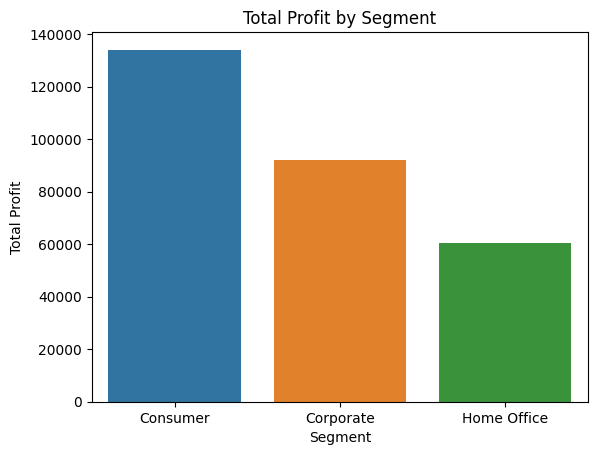

In [243]:
segment=data.groupby(["Segment"])["Profit"].sum()
print(segment)
sns.barplot(x=segment.index, y=segment.values)
plt.xticks(rotation=0)  
plt.xlabel("Segment")
plt.ylabel("Total Profit")
plt.title("Total Profit by Segment")
plt.show()

In [244]:
sales_and_Category = data[['Sales','Category']].groupby(['Sales','Category']).size().reset_index().max()
print('Maximum sales made : ', sales_and_Category[:1], 'in the category :' , sales_and_Category [1:2] )

Maximum sales made :  Sales    22638.48
dtype: object in the category : Category    Technology
dtype: object


# **PIE DATA FOR ANALYSING SUBCATEGORY SALES **

In [245]:
grouped_data = data[['Sales','Sub-Category']].groupby(['Sub-Category']).size()
grouped_profits = data[['Profit','Sub-Category']].groupby(['Sub-Category']).size()

Text(0.5, 1.0, 'Sub-category wise Sales')

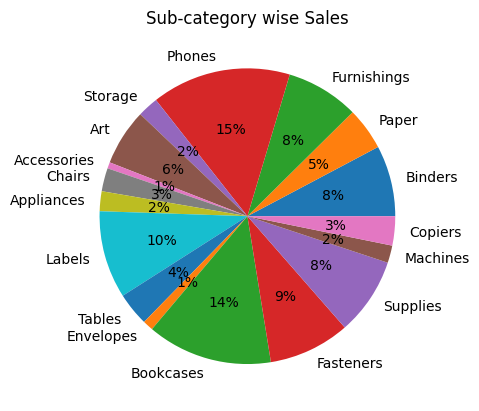

In [246]:
Category_count = data['Category'].value_counts()
category_index = data['Category'].value_counts().index
Subcategory_count = data['Sub-Category'].value_counts()
Subcategory_index = data['Sub-Category'].value_counts().index
plt.pie(grouped_data , labels = Subcategory_index, autopct = '%1.0f%%' )
plt.title('Sub-category wise Sales')

Text(0.5, 1.0, 'Sub-category wise profits')

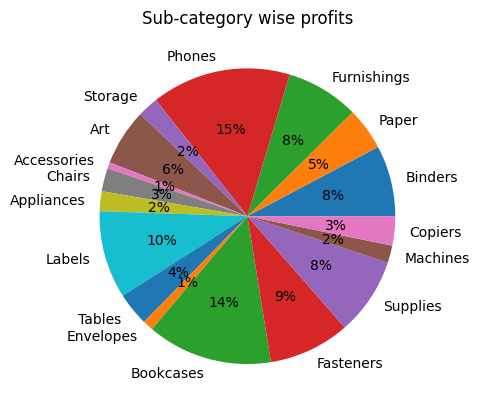

In [247]:
plt.pie(grouped_profits , labels = Subcategory_index, autopct = '%1.0f%%' )
plt.title('Sub-category wise profits')

The top 5 items beign sold are Phones, Furnishings, Binders, Paper and Storage.
Lets see the profit.

In [248]:
Profit_and_Category = data[['Profit','Category']].groupby(['Profit','Category']).size().reset_index().max()
print('Maximum profit made : ', Profit_and_Category[:1], 'in the category :' , Profit_and_Category [1:2] )

Maximum profit made :  Profit    8399.976
dtype: object in the category : Category    Technology
dtype: object


# Observations
1. Since phones are the most profitable and sold items, an opportunity for cross-selling related accessories, such as phone cases, screen protectors, or chargers, to boost sales and profits further.
2. Since consumers are the profitable and high selling segment, more marketing and product strategies should be focused on the consumers needs and preferences.
3. Clearence sales can be held to encourage the sales of least profitable items like envelopes, storage and accessories.
4. Standard is the most profitable shipping mode, this might be the reason due to it being cost-effective.****
